# Polynomial Regression: extending linear models with basis functions

[link](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

In [1]:
#Importación de librerías 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
#Imprimir versiones
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

2.0.2
2.2.3
3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:07:43) [MSC v.1942 64 bit (AMD64)]
1.6.1


***

$$y = X^3 + 100 + \epsilon$$

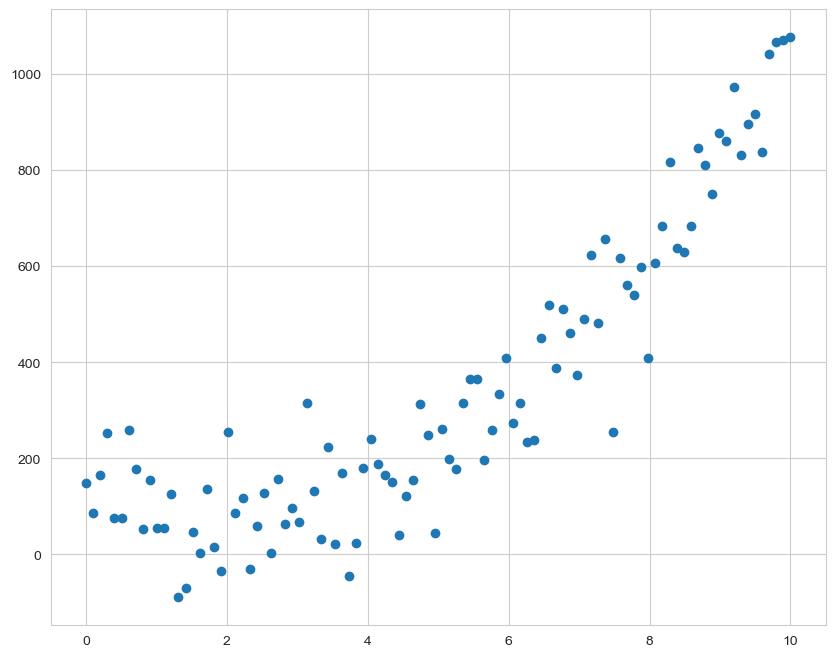

In [3]:
np.random.seed(42) # Establece la semilla aleatoria para reproducibilidad. Esto garantiza que los valores aleatorios generados sean los mismos en cada ejecución.
n_samples = 100 # Define el número de muestras (puntos de datos) a generar.

X = np.linspace(0, 10, 100) # Genera un array de 100 valores espaciados uniformemente entre 0 y 10.
# Esto representa la variable independiente 'X'.
rng = np.random.randn(n_samples) * 100 # Genera un array de 100 números aleatorios de una distribución normal (gaussiana) con una desviación estándar de 100.
# Esto representa el ruido aleatorio que se agregará a la variable dependiente 'y'.

y = X ** 3 + 100 + rng # Calcula la variable dependiente 'y' como una función cúbica de 'X' más una constante y el ruido aleatorio.

plt.figure(figsize=(10,8));
plt.scatter(X, y);

In [4]:
#Importa librerias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

0.7643394574930141


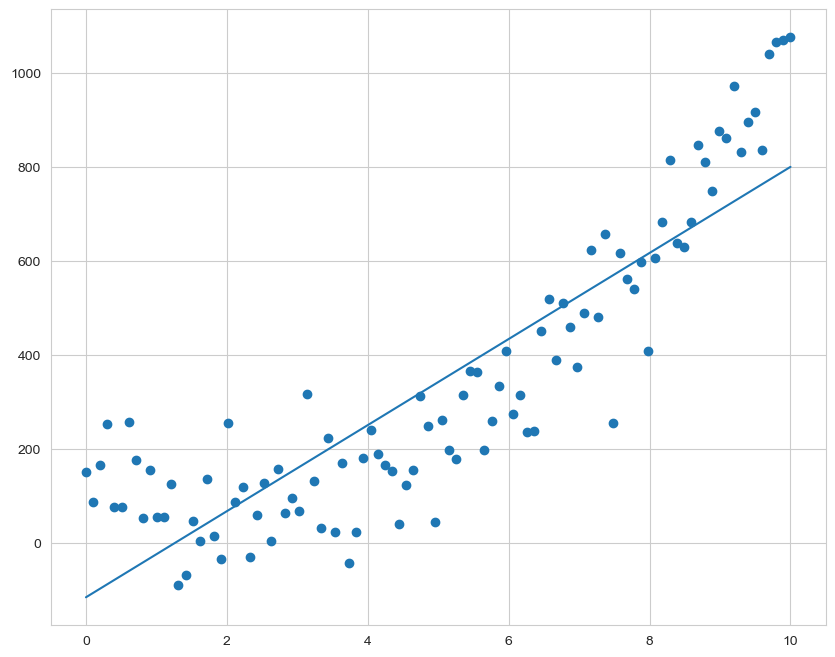

In [5]:
lr = LinearRegression() #Crea la instancia del modelo
lr.fit(X.reshape(-1, 1), y) # Ajusta el modelo de regresión lineal a los datos.
# X.reshape(-1, 1) transforma el array 1D 'X' en una matriz 2D con una sola columna.
# Esto es necesario porque sklearn espera que la variable independiente sea una matriz 2D.
model_pred = lr.predict(X.reshape(-1,1)) # Realiza predicciones utilizando el modelo ajustado.

#Crea el grafico con los datos
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

## Polynomial

In [6]:
#Importa el modelo de polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_reg = PolynomialFeatures(degree=2)  #Crea una instancia del transformador PolynomialFeatures.
# El parámetro 'degree=2' especifica que se generarán características polinómicas hasta el grado 2.
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))  #Transforma la variable independiente 'X' en características polinómicas.
# X.reshape(-1, 1) remodela 'X' de un array 1D a una matriz 2D con una sola columna, lo cual es requerido por PolynomialFeatures.
# fit_transform() primero ajusta el transformador a los datos (calcula los grados de los polinomios) y luego los transforma.
# El resultado 'X_poly' es una nueva matriz que contiene las características originales de 'X' junto con sus potencias hasta el grado 2 (X^0, X^1, X^2).

In [8]:
X[:5] #selecciona y muestra los primeros cinco elementos del array

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

In [9]:
X_poly[:5] 

array([[1.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304],
       [1.        , 0.2020202 , 0.04081216],
       [1.        , 0.3030303 , 0.09182736],
       [1.        , 0.4040404 , 0.16324865]])

In [10]:
degree_three = PolynomialFeatures(degree=3) # degree_three = PolynomialFeatures(degree=3): Crea una instancia del transformador PolynomialFeatures con grado 3.
# Esto significa que se generarán características polinómicas hasta el grado 3 (X^0, X^1, X^2, X^3).
example = degree_three.fit_transform(X.reshape(-1, 1))# example = degree_three.fit_transform(X.reshape(-1, 1)): Transforma la variable independiente 'X' en características polinómicas hasta el grado 3.
# X.reshape(-1, 1) remodela 'X' de un array 1D a una matriz 2D con una sola columna, lo cual es requerido por PolynomialFeatures.
# fit_transform() ajusta el transformador a los datos (calcula los grados de los polinomios) y luego los transforma.
# El resultado 'example' es una nueva matriz que contiene las características originales de 'X' junto con sus potencias hasta el grado 3.

In [11]:
example[:5] #Muestra los primeros 5

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304, 0.00103061],
       [1.        , 0.2020202 , 0.04081216, 0.00824488],
       [1.        , 0.3030303 , 0.09182736, 0.02782647],
       [1.        , 0.4040404 , 0.16324865, 0.06595905]])

In [12]:
res = np.array([0, 1, 2, 3, 4, 5]) #Crea un array de NumPy llamado 'res' que contiene los números enteros del 0 al 5.

In [13]:
res #Imprime la variable

array([0, 1, 2, 3, 4, 5])

In [14]:
res_two = poly_reg.fit_transform(res.reshape(-1, 1)) #Transforma el array 'res' en características polinómicas de grado 2.
# res.reshape(-1, 1) remodela 'res' de un array 1D a una matriz 2D con una sola columna, requerido por PolynomialFeatures.
# fit_transform() aplica la transformación previamente ajustada (en un paso anterior) a 'res'.
# El resultado 'res_two' es una nueva matriz que contiene las características polinómicas de 'res' hasta el grado 2.
res_two

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [15]:
#Aplica lo mismo que el anterior pero para grado 3
res_three = degree_three.fit_transform(res.reshape(-1, 1))
res_three

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [16]:
lin_reg_2 = LinearRegression() #Crea la instancia del modelo
lin_reg_2.fit(X_poly, y.reshape(-1, 1)) # Ajusta el modelo de regresión lineal a los datos transformados.
# X_poly contiene las características polinómicas de 'X'.
# y.reshape(-1, 1) remodela 'y' de un array 1D a una matriz 2D con una sola columna, requerido por LinearRegression.
y_pred = lin_reg_2.predict(X_poly) # y_pred = lin_reg_2.predict(X_poly): Realiza predicciones utilizando el modelo ajustado y las características polinómicas.
# El resultado 'y_pred' contiene las predicciones del modelo para los datos de entrada.


0.9173858308909386


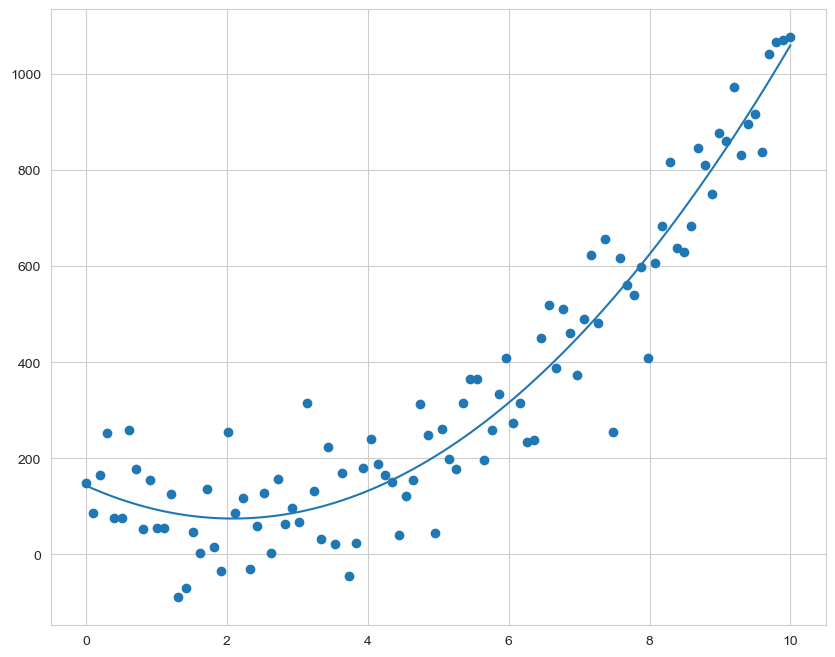

In [17]:
#Grafic alos datos
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

***

# Boston Housing Dataset

In [24]:
#Trae el data set de housing C:\Users\SABRINA PEREZ\anaconda3\Porgramacion-2\data\boston_house_prices.csv
df_boston = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)

df_boston.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] #Selecciona las columnas
#sns.pairplot(df_boston, size=1.5);

C:\Users\SABRINA PEREZ\AppData\Local\Temp\ipykernel_12772\2269000128.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_boston = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)


In [25]:
pd.options.display.float_format = "{:,.2f}".format #Crea el formato de dos puntos decimales
df_boston.corr() #Crea la matriz de correlación

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [26]:
X_boston = df_boston['DIS'].values #Crea la variable x
y_boston = df_boston['NOX'].values #Crea la variable y

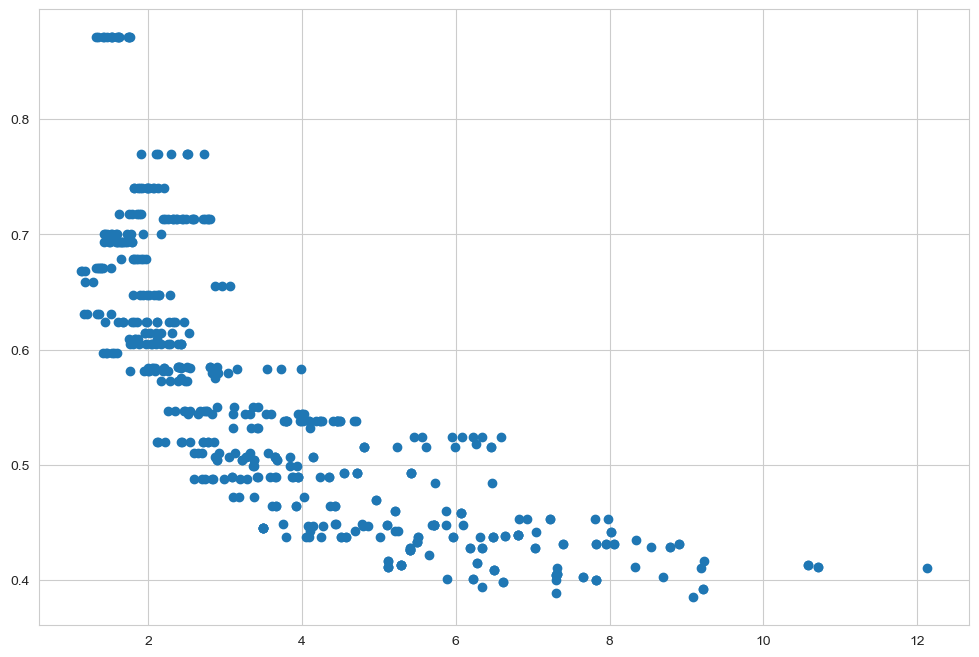

In [27]:
#Grafica los datos
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);

## Linear

R^2 score = 0.59


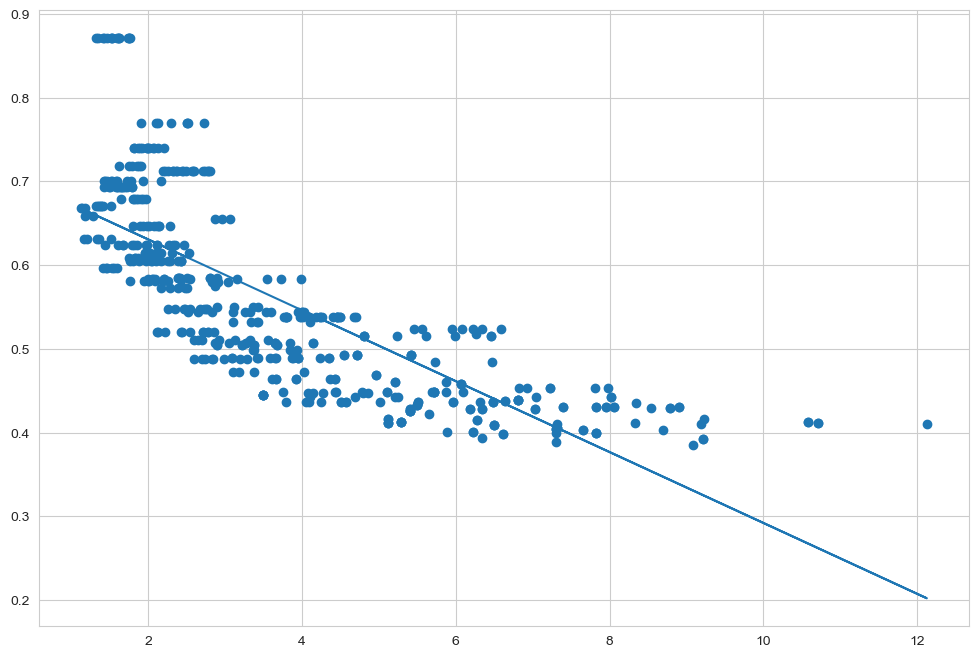

In [28]:
lr = LinearRegression() #Crea la instancia del modelo
lr.fit(X_boston.reshape(-1, 1), y_boston) #Entrena el modelo
model_pred = lr.predict(X_boston.reshape(-1,1)) #Predice con el modelo

#Grafica el modelo y obtiene el valor de r2
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

## Quadratic

In [29]:
poly_reg = PolynomialFeatures(degree=2) # poly_reg = PolynomialFeatures(degree=2): Crea una instancia del transformador PolynomialFeatures con grado 2.
# Esto significa que se generarán características polinómicas hasta el grado 2.
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1)) # X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1)): Transforma la variable independiente 'X_boston' en características polinómicas de grado 2.
# X_boston.reshape(-1, 1) remodela 'X_boston' de un array 1D a una matriz 2D con una sola columna, requerido por PolynomialFeatures.
# fit_transform() ajusta el transformador a los datos (calcula los grados de los polinomios) y luego los transforma.
# El resultado 'X_poly_b' es una nueva matriz que contiene las características polinómicas de 'X_boston' hasta el grado 2.
lin_reg_2 = LinearRegression() # lin_reg_2 = LinearRegression(): Crea una instancia del modelo de regresión lineal.

In [30]:
lin_reg_2.fit(X_poly_b, y_boston) # lin_reg_2.fit(X_poly_b, y_boston): Ajusta el modelo de regresión lineal a los datos transformados.
# X_poly_b contiene las características polinómicas de 'X_boston'.
# y_boston contiene la variable dependiente.

LinearRegression()

In [31]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis] # X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]: Crea un array de NumPy llamado 'X_fit' que contiene valores espaciados uniformemente dentro del rango de 'X_boston'.
# np.arange(X_boston.min(), X_boston.max(), 1) genera una secuencia de números enteros desde el valor mínimo de 'X_boston' hasta el valor máximo de 'X_boston', con un paso de 1.
# [:, np.newaxis] remodela el array resultante de 1D a 2D, añadiendo una nueva dimensión de columna. Esto es necesario para que 'X_fit' tenga la forma adecuada para ser utilizado en predicciones con modelos de sklearn.

In [32]:
X_fit #Imprime la variable

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [33]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1))) #Realiza predicciones utilizando el modelo de regresión lineal ajustado.

R^2 score = 0.70


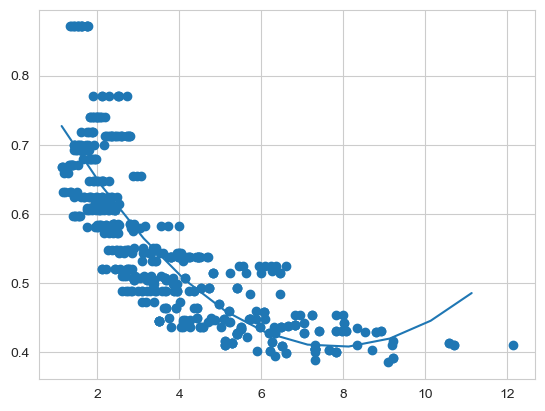

In [34]:
#Grafica los datos
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_2.predict(X_poly_b))))

## Cubic

In [35]:
poly_reg = PolynomialFeatures(degree=3) # Crea una instancia del transformador PolynomialFeatures con grado 3.
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1)) #Transforma la variable independiente 'X_boston' en características polinómicas de grado 3
lin_reg_3 = LinearRegression() #Crea una instancia del modelo de regresión lineal.

In [36]:
lin_reg_3.fit(X_poly_b, y_boston) #Entrena el modelo

LinearRegression()

In [37]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis] #Crea un array de NumPy llamado 'X_fit' que contiene valores espaciados uniformemente dentro del rango de 'X_boston'.
# np.arange(X_boston.min(), X_boston.max(), 1) genera una secuencia de números enteros desde el valor mínimo de 'X_boston' hasta el valor máximo de 'X_boston', con un paso de 1.
# [:, np.newaxis] remodela el array resultante de 1D a 2D, añadiendo una nueva dimensión de columna. Esto es necesario para que 'X_fit' tenga la forma adecuada para ser utilizado en predicciones con modelos de sklearn.

In [38]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1))) #Realiza predicciones utilizando el modelo de regresión lineal ajustado.

R^2 score = 0.71


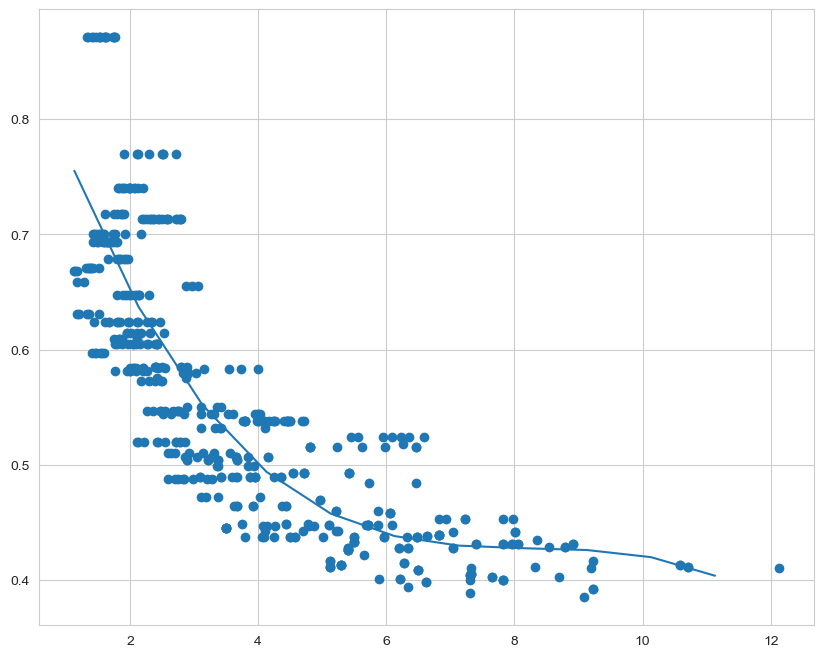

In [39]:
#Grafica los datos
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_3.predict(X_poly_b))))

***